In [1]:
import os
from os import path
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as sk

In [2]:
def getNormed(this_array, this_min = 0, this_max = 255, set_to_int = True):
    new_var = this_array.copy()
    rat = (this_max - this_min)/(new_var.max() - new_var.min())
    new_var = new_var * rat
    new_var -= new_var.min()
    new_var += this_min
    if set_to_int:
        return new_var.astype('uint8')
    return new_var

In [3]:
train = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/Agreement_Binary_Rating.csv')
len(train)

1332

In [4]:
display(train)

,noduleID,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,1,4,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,5,118,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
2,3,134,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
3,4,143,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
4,6,175,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
...,...,...,...,...,...,...,...,...,...,...,...
1327,2655,40771,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Testing
1328,2657,40780,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1329,2656,40794,1,2,2,Unknown,0,No Radiologist Agreement,0,Low_No,Low/None
1330,2658,40801,1,2,2,Unknown,0,No Radiologist Agreement,0,Low_No,Low/None


In [5]:
training_data = train.sample(frac=0.8)
testing_data = train.drop(training_data.index)

In [6]:
training_data.to_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/training_2class.csv')
testing_data.to_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/test_2class.csv')

In [7]:
print("training_data:",len(training_data))
print("testing_data:",len(testing_data))

training_data: 1066
testing_data: 266


In [8]:
train_nodIds = np.array(training_data['noduleID'])
test_nodIds = np.array(testing_data['noduleID'])

In [9]:
# collect all images for training
image_folder = '/Users/amalalmansour/Desktop/images_1332'
train_images = []
val_images = []
test_images = []
train_noduleId = []
val_noduleId = []
test_noduleId = []
print(image_folder)

for dir1 in os.listdir(image_folder):
    print(dir1)
    if not dir1.startswith('.'):
        for file in os.listdir(os.path.join(image_folder, dir1)):
            #print(file)
            noduleID = file.split('.')[0]
            if not file.startswith('.'):
                noduleID = int(noduleID)
                if noduleID in train_nodIds:
                    train_noduleId.append(noduleID)
                    temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                    temp_image = getNormed(temp_image)
                    #enlarged_img = getSamePadding(temp_image)
                    train_images.append(temp_image)
            
                '''if noduleID in val_nodIds:
                    val_noduleId.append(noduleID)
                    temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                    temp_image = getNormed(temp_image)
                    val_images.append(temp_image)'''
            
        
                if noduleID in test_nodIds:
                    test_noduleId.append(noduleID)
                    temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                    temp_image = getNormed(temp_image)
                    test_images.append(temp_image)

/Users/amalalmansour/Desktop/images_1332
.DS_Store
Malignancy_2
Malignancy_5
Malignancy_4
Malignancy_3
Malignancy_1


In [10]:
print("train_images:",len(train_images))
#print("val_images:",len(val_images))
print("test_images:",len(test_images))

train_images: 1066
test_images: 266


In [11]:
tr_df = pd.DataFrame(train_noduleId,columns =['noduleID'])
print(tr_df)

      noduleID
0         1084
1         2412
2         2374
3          471
4         1907
...        ...
1061       643
1062      2609
1063       904
1064      2594
1065       290

[1066 rows x 1 columns]


In [12]:
train_slices = pd.merge(tr_df, training_data)
display(train_slices)

,noduleID,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,1084,15915,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,2412,36785,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Testing
2,2374,36253,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
3,471,6853,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
4,1907,29039,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
...,...,...,...,...,...,...,...,...,...,...,...
1061,643,9251,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Testing
1062,2609,39936,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Testing
1063,904,13301,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
1064,2594,39806,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training


In [13]:
te_df = pd.DataFrame(test_noduleId,columns =['noduleID'])
print(te_df)

     noduleID
0        1044
1        2558
2        1321
3        2101
4         407
..        ...
261      1110
262      2421
263       293
264       657
265      2219

[266 rows x 1 columns]


In [14]:
test_slices = pd.merge(te_df, testing_data)
display(test_slices)

,noduleID,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,1044,15190,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,2558,39203,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
2,1321,19937,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
3,2101,31645,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
4,407,5987,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
...,...,...,...,...,...,...,...,...,...,...,...
261,1110,16322,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
262,2421,36955,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
263,293,4301,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
264,657,9498,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training


In [16]:
x_train, x_val, y_train, y_val = sk.train_test_split(train_images,train_slices['Two_Agreement'],test_size=0.2, shuffle=True)

In [17]:
x_test = test_images
y_test = test_slices['Two_Agreement']

In [18]:
y_train.value_counts()

1    474
0    378
Name: Two_Agreement, dtype: int64

In [19]:
y_test.value_counts()

1    141
0    125
Name: Two_Agreement, dtype: int64

In [20]:
train_images = np.array(x_train)
print(len(train_images))
val_images = np.array(x_val)
print(len(val_images))
test_images = np.array(x_test)
print(len(test_images))

852
214
266


In [21]:
# Reshape the data so the pixel vectors turn into arrays, and so the instance id's are also arrays
train_data = train_images.reshape(train_images.shape[0],71,71,1)  
train_ids = np.array(y_train)
val_data = val_images.reshape(val_images.shape[0],71,71,1)  
val_ids = np.array(y_val)
test_data = test_images.reshape(test_images.shape[0], 71, 71,1)
test_ids = np.array(y_test)

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(71, 71, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
#model.summary()

In [24]:
model.add(layers.Flatten())
model.output_shape

(None, 65536)

In [25]:
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(4,activation='softmax'))
model.add(layers.Dense(2,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 2)                 131074    
                                                                 
Total params: 149,890
Trainable params: 149,890
Non-trainable params: 0
__________________________________________________

In [27]:
# Compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_data, train_ids, epochs=50
                    , validation_data=(val_data, val_ids))

Epoch 1/50
27/27 [==============================] - 1s 22ms/step - loss: 28.3092 - accuracy: 0.5387 - val_loss: 0.6614 - val_accuracy: 0.5794
Epoch 2/50
27/27 [==============================] - 0s 15ms/step - loss: 0.5506 - accuracy: 0.7289 - val_loss: 0.6629 - val_accuracy: 0.6402
Epoch 3/50
27/27 [==============================] - 0s 14ms/step - loss: 0.3846 - accuracy: 0.8310 - val_loss: 0.7592 - val_accuracy: 0.5888
Epoch 4/50
27/27 [==============================] - 0s 15ms/step - loss: 0.2352 - accuracy: 0.9096 - val_loss: 0.9198 - val_accuracy: 0.6215
Epoch 5/50
27/27 [==============================] - 0s 14ms/step - loss: 0.1288 - accuracy: 0.9648 - val_loss: 1.1975 - val_accuracy: 0.5935
Epoch 6/50
27/27 [==============================] - 0s 15ms/step - loss: 0.0691 - accuracy: 0.9847 - val_loss: 1.3750 - val_accuracy: 0.5841
Epoch 7/50
27/27 [==============================] - 0s 14ms/step - loss: 0.0315 - accuracy: 0.9977 - val_loss: 1.7704 - val_accuracy: 0.5841
Epoch 8/50
2

In [28]:
#model.save("/Users/amalalmansour/Desktop/New_Images/Malignancy/CNN/CNN_model_All")

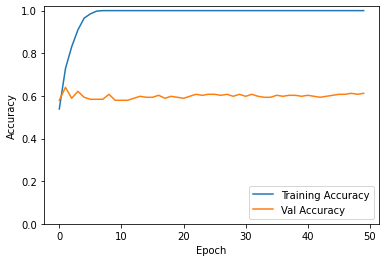

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.02])
plt.legend(loc='lower right')

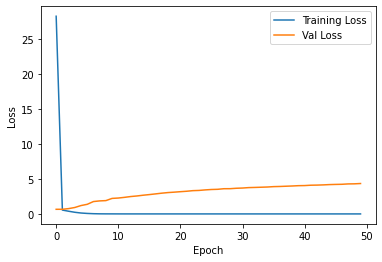

In [30]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 1.02])
plt.legend(loc='upper right')

In [31]:
test_loss, test_acc = model.evaluate(test_data,  test_ids, verbose=2)

9/9 - 0s - loss: 4.1077 - accuracy: 0.5865 - 102ms/epoch - 11ms/step


In [32]:
test_acc

0.5864661931991577

In [33]:
predictions = model.predict(test_data)

In [34]:
#y_pred = (predictions > 0.5)

In [35]:
print(predictions)

[[1.00000000e+00 8.19570900e-09]
 [1.47391009e-04 9.99852538e-01]
 [9.55778248e-08 9.99999881e-01]
 [9.93990302e-01 6.00974588e-03]
 [1.31550196e-11 1.00000000e+00]
 [2.79340353e-02 9.72066045e-01]
 [2.94158250e-01 7.05841839e-01]
 [9.99765813e-01 2.34235005e-04]
 [1.10233254e-04 9.99889731e-01]
 [6.80902576e-06 9.99993205e-01]
 [8.21413577e-01 1.78586453e-01]
 [5.08050919e-01 4.91949111e-01]
 [9.99888182e-01 1.11751819e-04]
 [9.59214628e-01 4.07854244e-02]
 [1.23064523e-03 9.98769403e-01]
 [4.74334061e-01 5.25665998e-01]
 [4.45512962e-03 9.95544851e-01]
 [9.99833763e-01 1.66327824e-04]
 [1.98947528e-04 9.99801099e-01]
 [7.81276022e-09 1.00000000e+00]
 [1.18679509e-06 9.99998808e-01]
 [4.37569286e-10 1.00000000e+00]
 [9.66002047e-01 3.39979827e-02]
 [3.42797903e-05 9.99965668e-01]
 [5.51830113e-01 4.48169887e-01]
 [1.39962996e-17 1.00000000e+00]
 [9.98964548e-01 1.03539426e-03]
 [1.81175783e-01 8.18824172e-01]
 [5.23039341e-01 4.76960748e-01]
 [1.54776545e-03 9.98452187e-01]
 [9.999974

In [ ]:
y_preds_multiclass = predictions.argmax(axis=1)

In [41]:
y_preds_multiclass

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

In [42]:
tr_predictions = model.predict(train_data)
y_tr_preds_multiclass = tr_predictions.argmax(axis=1)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
import itertools
#creating cunfusion matrix

def custom_confusion_matrix(y_true, y_pred, classes=None,figsize=(15,15), text_size=15):
    #figsize = (10,10)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]#normalize the confusion matrix
    n_classes = cm.shape[0]
    
    #adjusting the cunfusion matrix
    fig, ax = plt.subplots(figsize=figsize)
    #Creating a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    #create classes
    #classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    #Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set axis label to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    #Set threshold for diffferent colors
    threshold = (cm.max() + cm.min())/2.
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100: .1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size = text_size)

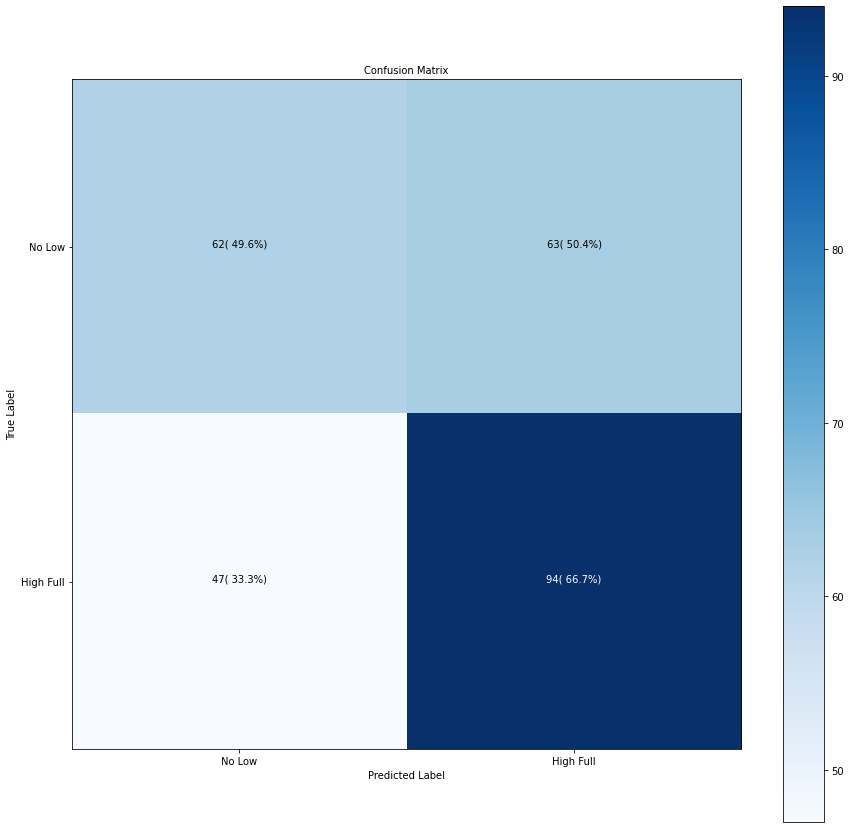

In [45]:
#classes_name = ["No","Low", "High", "Full"]
classes_name = ["No Low", "High Full"]
custom_confusion_matrix(test_ids,
                       y_preds_multiclass,
                       classes_name,
                       (15,15),
                       10)

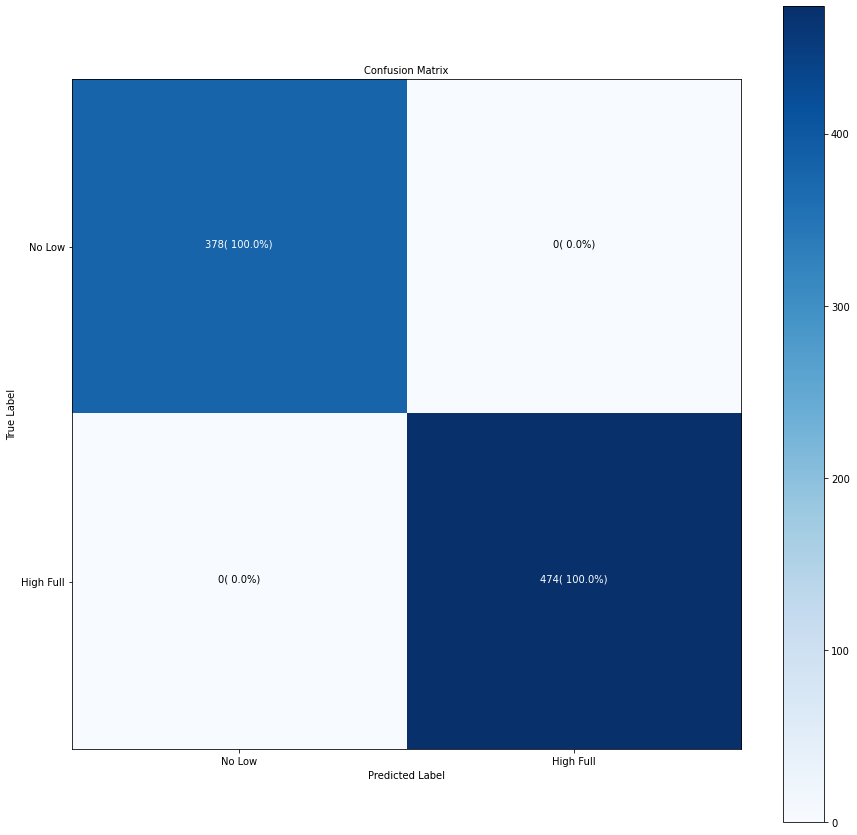

In [46]:
custom_confusion_matrix(train_ids,
                       y_tr_preds_multiclass,
                       classes_name,
                       (15,15),
                       10)